<a href="https://colab.research.google.com/github/ajaysaikiran2208/Natural-Language-Processing/blob/main/Text_summarization_using_T5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Text Summarization usinf Text-to-Text Transfer Transformer [ T5 ]

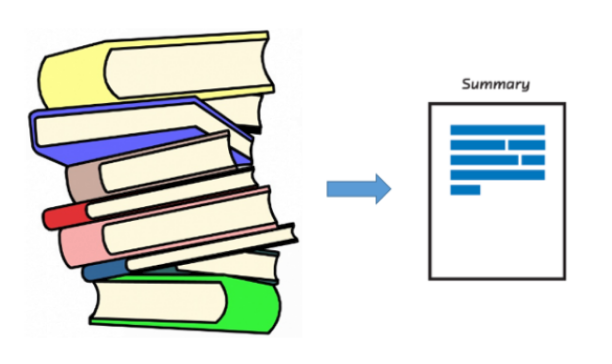

Copyright 2020, Denis Rothman. MIT License. Hugging Face usage example was modified for educational purposes.

#Initializing the T5-large transformer model

In [1]:
!pip install transformers

In [2]:
pip install sentencepiece==0.1.94

We can choose to display the architecture of the model or not when we initialize the
model:

In [3]:
display_architecture=True

If we set display_architecture to True, the structure of the encoder layers, decoder
layers, and feedforward sub-layers will be displayed.

In [4]:
!pip install torchtext==0.8.0 torch==1.7.1 pytorch-lightning==1.2.2

In [5]:
import torch
import json 
from transformers import T5Tokenizer, T5ForConditionalGeneration, T5Config



In [6]:
model = T5ForConditionalGeneration.from_pretrained('t5-large')
tokenizer = T5Tokenizer.from_pretrained('t5-large')
device = torch.device('cpu')

Some weights of the model checkpoint at t5-large were not used when initializing T5ForConditionalGeneration: ['decoder.block.0.layer.1.EncDecAttention.relative_attention_bias.weight']
- This IS expected if you are initializing T5ForConditionalGeneration from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing T5ForConditionalGeneration from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [7]:
if display_architecture==True:
 print(model.config)

T5Config {
  "_name_or_path": "t5-large",
  "architectures": [
    "T5WithLMHeadModel"
  ],
  "d_ff": 4096,
  "d_kv": 64,
  "d_model": 1024,
  "decoder_start_token_id": 0,
  "dropout_rate": 0.1,
  "eos_token_id": 1,
  "feed_forward_proj": "relu",
  "initializer_factor": 1.0,
  "is_encoder_decoder": true,
  "layer_norm_epsilon": 1e-06,
  "model_type": "t5",
  "n_positions": 512,
  "num_decoder_layers": 24,
  "num_heads": 16,
  "num_layers": 24,
  "output_past": true,
  "pad_token_id": 0,
  "relative_attention_num_buckets": 32,
  "task_specific_params": {
    "summarization": {
      "early_stopping": true,
      "length_penalty": 2.0,
      "max_length": 200,
      "min_length": 30,
      "no_repeat_ngram_size": 3,
      "num_beams": 4,
      "prefix": "summarize: "
    },
    "translation_en_to_de": {
      "early_stopping": true,
      "max_length": 300,
      "num_beams": 4,
      "prefix": "translate English to German: "
    },
    "translation_en_to_fr": {
      "early_stopping": t

In [8]:
if(display_architecture==True):
  print(model)

T5ForConditionalGeneration(
  (shared): Embedding(32128, 1024)
  (encoder): T5Stack(
    (embed_tokens): Embedding(32128, 1024)
    (block): ModuleList(
      (0): T5Block(
        (layer): ModuleList(
          (0): T5LayerSelfAttention(
            (SelfAttention): T5Attention(
              (q): Linear(in_features=1024, out_features=1024, bias=False)
              (k): Linear(in_features=1024, out_features=1024, bias=False)
              (v): Linear(in_features=1024, out_features=1024, bias=False)
              (o): Linear(in_features=1024, out_features=1024, bias=False)
              (relative_attention_bias): Embedding(32, 16)
            )
            (layer_norm): T5LayerNorm()
            (dropout): Dropout(p=0.1, inplace=False)
          )
          (1): T5LayerFF(
            (DenseReluDense): T5DenseReluDense(
              (wi): Linear(in_features=1024, out_features=4096, bias=False)
              (wo): Linear(in_features=4096, out_features=1024, bias=False)
              (

In [9]:

def summarize(text,ml):
  preprocess_text = text.strip().replace("\n","")
  t5_prepared_Text = "summarize: "+preprocess_text
  print ("Preprocessed and prepared text: \n", t5_prepared_Text)

  tokenized_text = tokenizer.encode(t5_prepared_Text, return_tensors="pt").to(device)

  # summmarize 
  summary_ids = model.generate(tokenized_text,
                                      num_beams=4,
                                      no_repeat_ngram_size=2,
                                      min_length=30,
                                      max_length=ml,
                                      early_stopping=True)

  output = tokenizer.decode(summary_ids[0], skip_special_tokens=True)
  return output

In [12]:
text="""You can start by defining what a transformer is. 
Then move on to describe the principle behind the transformer. 
Then describe the basic setup of a transformer. 
Then finally write how a transformer works.
An electrical device that can change the A.C. current is known as a transformer.
Principle – A transformer works on the principle of mutual induction. Mutual induction is the phenomenon by which when the amount of magnetic flux linked with a coil changes, an E.M.F. is induced in the neighboring coil.
"""
print("Number of characters:",len(text))
summary=summarize(text,75)
print ("\n\nSummarized text: \n",summary)

Number of characters: 509
Preprocessed and prepared text: 
 summarize: You can start by defining what a transformer is. Then move on to describe the principle behind the transformer. Then describe the basic setup of a transformer. Then finally write how a transformer works.An electrical device that can change the A.C. current is known as a transformer.Principle – A transformer works on the principle of mutual induction. Mutual induction is the phenomenon by which when the amount of magnetic flux linked with a coil changes, an E.M.F. is induced in the neighboring coil.


Summarized text: 
 an electrical device that can change the A.C. current is known as a transformer. transformers work on the principle of mutual induction - when the amount of magnetic flux linked with one coil changes, an E.M.F. is induced in the neighboring coil.
